<a href="https://colab.research.google.com/github/IonutCiprian/BDA/blob/main/Twitter_Sentiment_Analysis_using_Python_in_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Upload de fisier csv
from google.colab import files

uploaded = files.upload()

Saving Sentiment Analysis Dataset_exported.csv to Sentiment Analysis Dataset_exported.csv


In [ ]:
#Citeste csv-ul uploadat
import pandas as pd

df = pd.read_csv("Sentiment Analysis Dataset_exported.csv")

In [ ]:
#Afiseaza primele 2 randuri
df.head(2)


,textID,text,rating,sentiment,Time of Tweet,Age of User,Country,Population,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,4,neutral,morning,24,Afghanistan,38928346,652860,60
1,96d74cb729,Shanghai is also really exciting (precisely -...,1,positive,noon,26,Albania,2877797,27400,105


In [ ]:
#Afiseaza primele 100 randuri
df.head(100)

,textID,text,rating,sentiment,Time of Tweet,Age of User,Country,Population,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,4,neutral,morning,24,Afghanistan,38928346,652860,60
1,96d74cb729,Shanghai is also really exciting (precisely -...,1,positive,noon,26,Albania,2877797,27400,105
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",1,negative,night,43,Algeria,43851044,2381740,18
3,01082688c6,happy bday!,2,positive,morning,67,Andorra,77265,470,164
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,5,positive,noon,66,Angola,32866272,1246700,26
...,...,...,...,...,...,...,...,...,...,...
95,71fa60d9ff,was so excited to eat the wartermelon i bought...,1,neutral,night,57,Lesotho,2142249,30360,71
96,c238c4dbb7,i just watched Marley & Me...i cried so hard!,3,negative,morning,31,Liberia,5057681,96320,53
97,dc73e85417,Take antibacterial to school to clean your han...,1,neutral,noon,51,Libya,6871292,1759540,4
98,af63915fa9,I`m leaving work now. Trying to decide if I re...,6,neutral,night,57,Liechtenstein,38128,160,238


In [ ]:
import numpy as np
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Analiza textului
df['text'] = df['text'].replace(np.nan, '', regex=True)

sentiment_scores = []
for text in df['text']:
  scores = sid.polarity_scores(text)
  sentiment_scores.append(scores['compound'])

df['Sentiment Score'] = sentiment_scores

In [ ]:
# Clasificarea scorului
def get_sentiment_label(score):
  if score >= 0.01:
    return 'Positive'
  if score <= -0.01:
    return 'Negative'
  else:
    return 'Neutral'

sentiment_labels = df['Sentiment Score'].apply(get_sentiment_label)

df['Sentiment Label'] = sentiment_labels



In [ ]:
#Vizualizam cele 2 noi coloane
df.head(10)

,textID,text,rating,sentiment,Time of Tweet,Age of User,Country,Population,Land Area (Km²),Density (P/Km²),Sentiment Score,Sentiment Label
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,4,neutral,morning,24,Afghanistan,38928346,652860,60,0.0000,Neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,1,positive,noon,26,Albania,2877797,27400,105,0.7501,Positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",1,negative,night,43,Algeria,43851044,2381740,18,-0.7345,Negative
3,01082688c6,happy bday!,2,positive,morning,67,Andorra,77265,470,164,0.6114,Positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,5,positive,noon,66,Angola,32866272,1246700,26,0.4738,Positive
5,726e501993,that`s great!! weee!! visitors!,1,positive,night,23,Antigua and Barbuda,97929,440,223,0.7405,Positive
6,261932614e,I THINK EVERYONE HATES ME ON HERE lol,3,negative,morning,22,Argentina,45195774,2736690,17,-0.2103,Negative
7,afa11da83f,"soooooo wish i could, but im in school and my...",2,negative,noon,39,Armenia,2963243,28470,104,-0.3048,Negative
8,e64208b4ef,and within a short time of the last clue all ...,5,neutral,night,48,Australia,25499884,7682300,3,0.0000,Neutral
9,37bcad24ca,What did you get? My day is alright.. haven`...,6,neutral,morning,62,Austria,9006398,82400,109,0.0000,Neutral


In [ ]:
# Exemplu de creare și exportare a unui DataFrame
import pandas as pd

# Salvare DataFrame într-un fișier CSV
df.to_csv('Sentiment Analysis Dataset_exported.csv', index=False)

# Descărcare fișier
from google.colab import files
files.download('Sentiment Analysis Dataset_exported.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

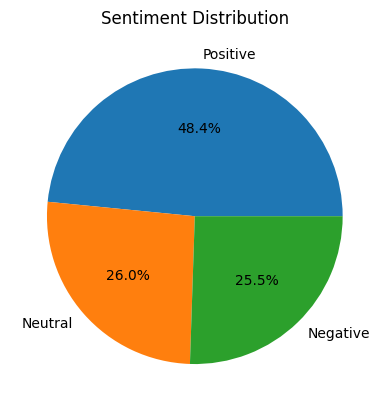

In [ ]:
#Vizualizarea datelor
import matplotlib.pyplot as plt

#numararea de reviuri
sentiment_counts = df['Sentiment Label'].value_counts()

#creare PieChart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

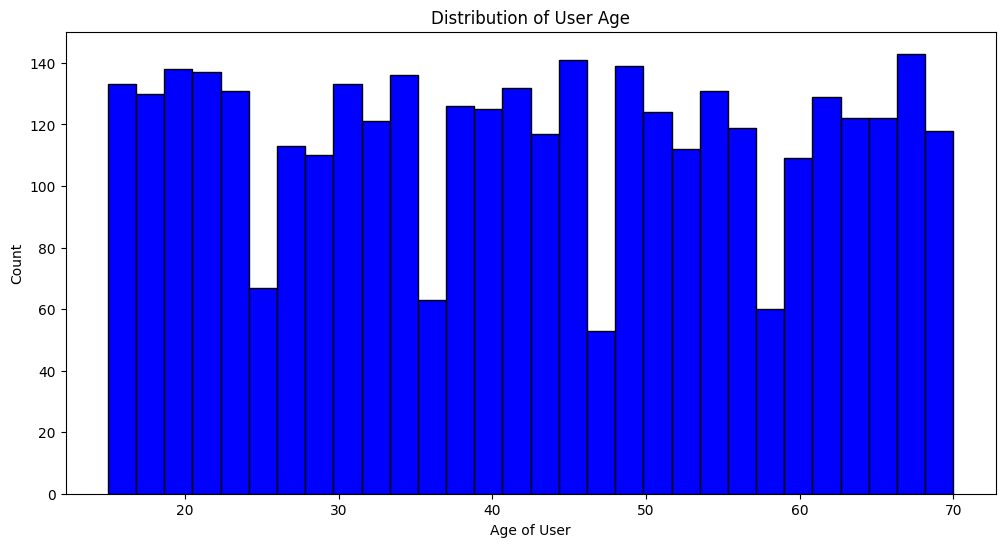

In [ ]:
# Asigură-te că ai importat librăriile necesare și ai definit DataFrame-ul și coloanele corect
import matplotlib.pyplot as plt

# Plotează un histogramă pentru distribuția vârstei utilizatorilor
plt.figure(figsize=(12, 6))
plt.hist(df['Age of User'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of User Age')
plt.xlabel('Age of User')
plt.ylabel('Count')
plt.show()

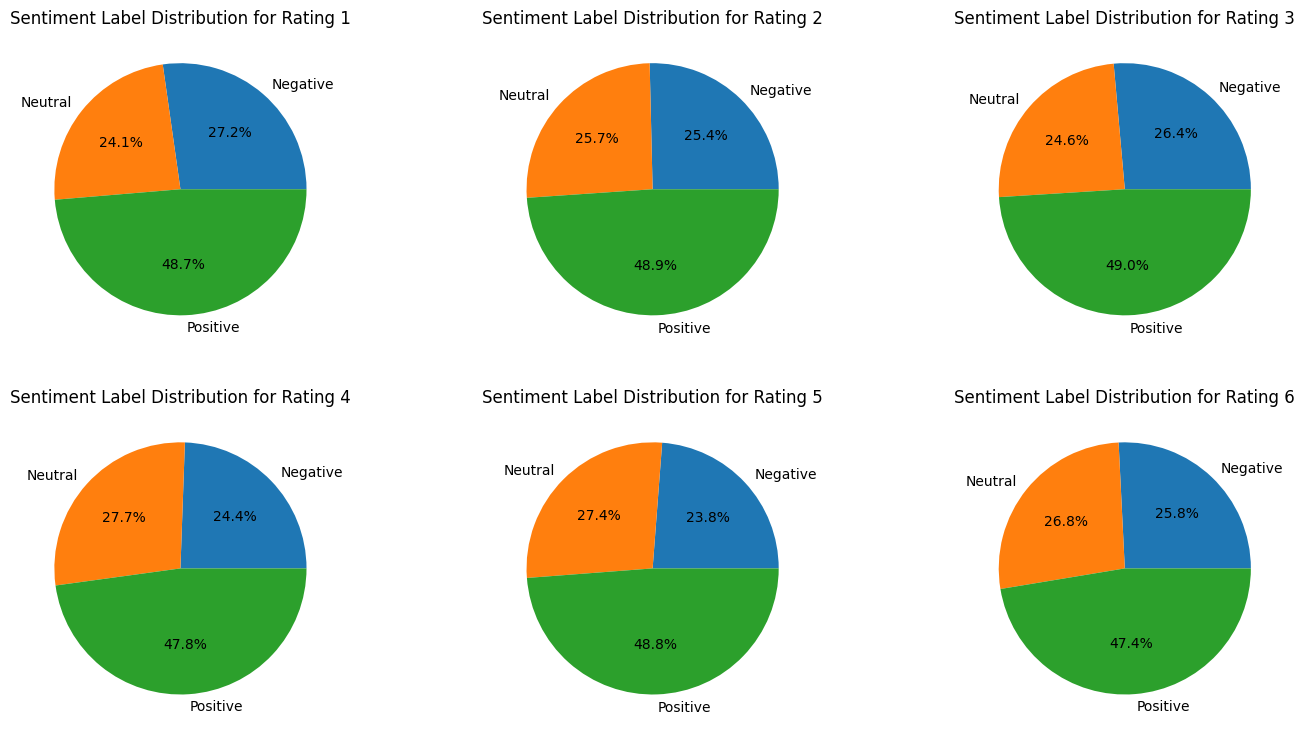

In [ ]:
import matplotlib.pyplot as plt

# Asigură-te că ai importat librăriile necesare și ai definit DataFrame-ul și coloanele corect

# Creează o figură cu subgrafice pentru fiecare rating
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Iterează prin fiecare rating și plotează diagrama tip pie corespunzătoare
for rating, ax in zip(range(1, 7), axes.flatten()):
    data = grouped[grouped['rating'] == rating]
    ax.pie(data['Count'], labels=data['Sentiment Label'], autopct='%1.1f%%')
    ax.set_title(f'Sentiment Label Distribution for Rating {rating}')

# Ajustează layout-ul pentru a evita suprapunerea și a face subgraficele pentru rating-ul 5 mai mici
plt.tight_layout(pad=3.0)

# Afișează diagrama
plt.show()

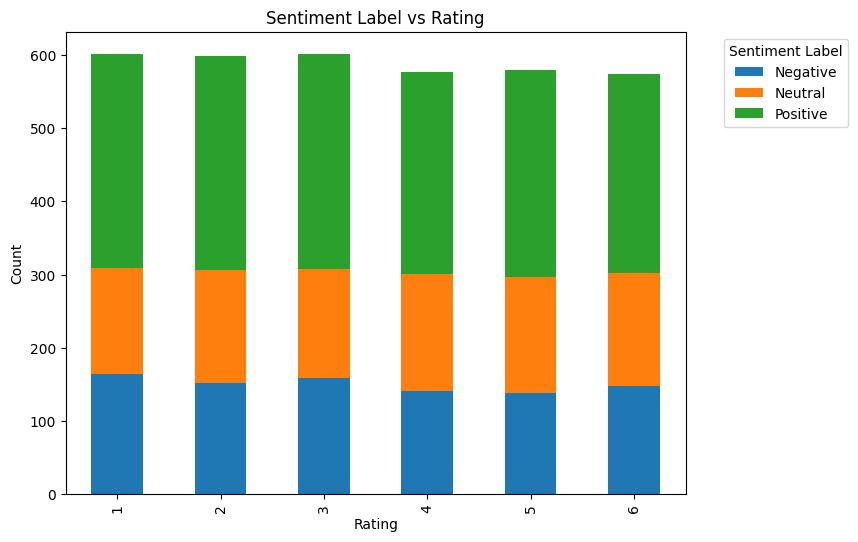

In [ ]:
# Asigură-te că ai importat librăriile necesare și ai definit DataFrame-ul și coloanele corect
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Creează un tabel de frecvență pentru rating și etichetele de sentiment
table = pd.crosstab(df['rating'], df['Sentiment Label'])

# Plotează un grafic de bare apilat
table.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.title('Sentiment Label vs Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

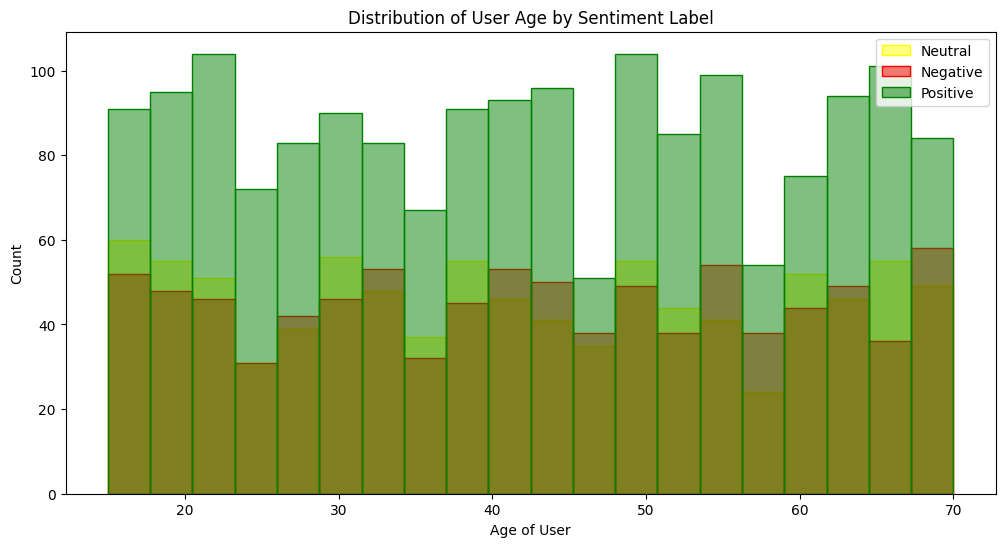

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asigură-te că ai importat librăriile necesare și ai definit DataFrame-ul și coloanele corect

# Plotează distribuția vârstelor pentru fiecare categorie de sentiment
plt.figure(figsize=(12, 6))
sns.histplot(x='Age of User', data=df[df['Sentiment Label'] == 'Neutral'], bins=20, color='yellow', edgecolor='yellow', label='Neutral', alpha=0.5)
sns.histplot(x='Age of User', data=df[df['Sentiment Label'] == 'Negative'], bins=20, color='red', edgecolor='red', label='Negative', alpha=0.5)
sns.histplot(x='Age of User', data=df[df['Sentiment Label'] == 'Positive'], bins=20, color='green', edgecolor='green', label='Positive', alpha=0.5)

plt.title('Distribution of User Age by Sentiment Label')
plt.xlabel('Age of User')
plt.ylabel('Count')
plt.legend()
plt.show()

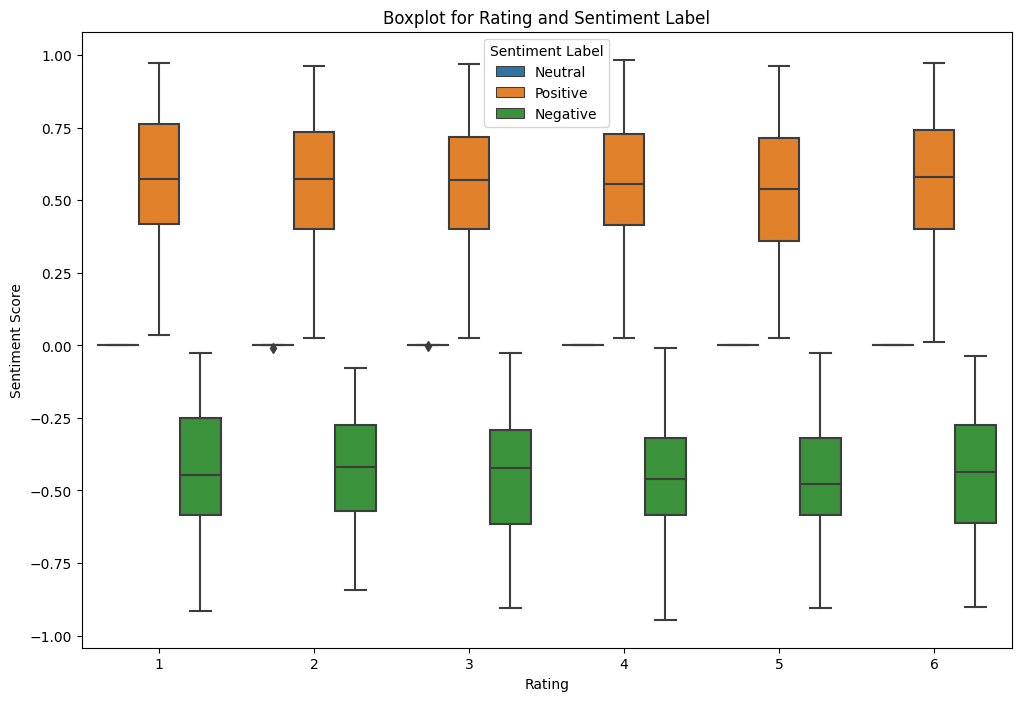

In [ ]:
#Diagramă de tip Boxplot pentru Rating și Sentiment Label:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.boxplot(x='rating', y='Sentiment Score', hue='Sentiment Label', data=df)
plt.title('Boxplot for Rating and Sentiment Label')
plt.xlabel('Rating')
plt.ylabel('Sentiment Score')
plt.show()

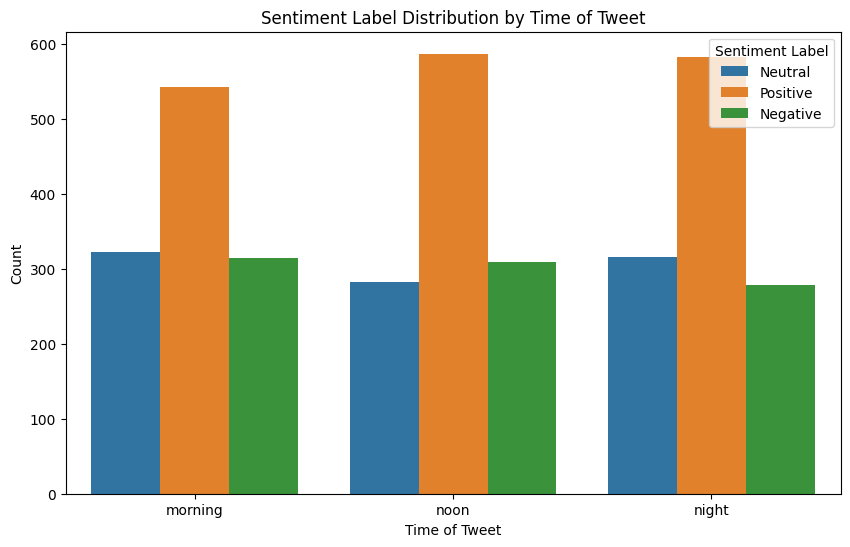

In [ ]:
#Diagramă de tip Bar pentru Sentiment Label în funcție de Time of Tweet:
plt.figure(figsize=(10, 6))
sns.countplot(x='Time of Tweet', hue='Sentiment Label', data=df)
plt.title('Sentiment Label Distribution by Time of Tweet')
plt.xlabel('Time of Tweet')
plt.ylabel('Count')
plt.show()

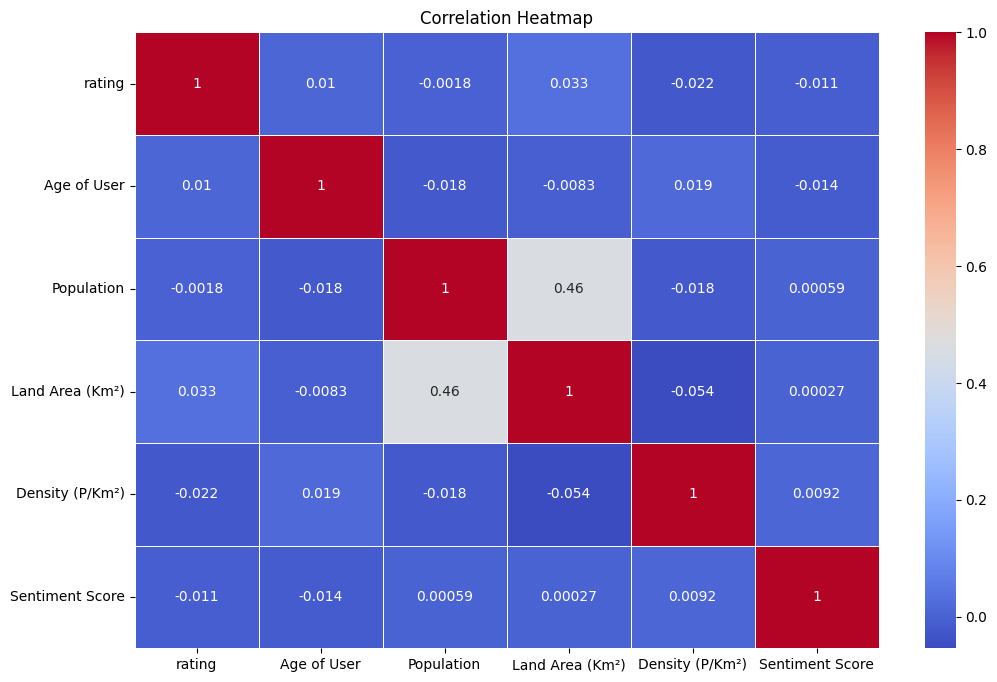

In [ ]:
#Diagramă de tip Heatmap pentru Corelații:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

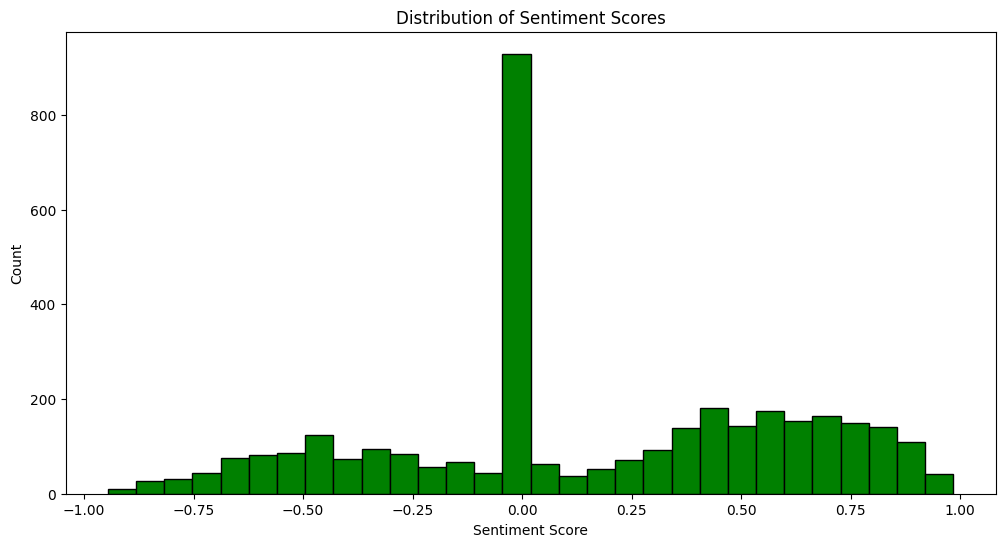

In [ ]:
#Histogramă a Sentiment Score:
plt.figure(figsize=(12, 6))
plt.hist(df['Sentiment Score'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

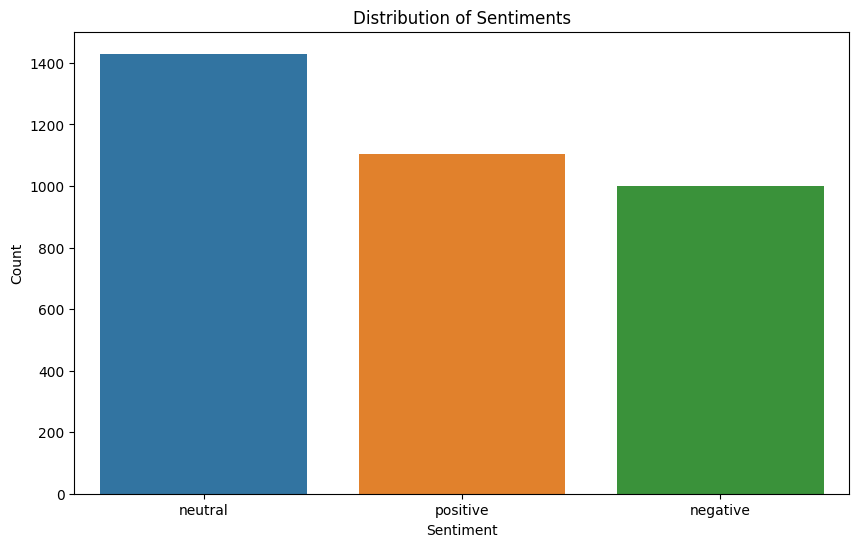

In [ ]:
#Diagramă de Bare pentru Distribuția Sentimentelor:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

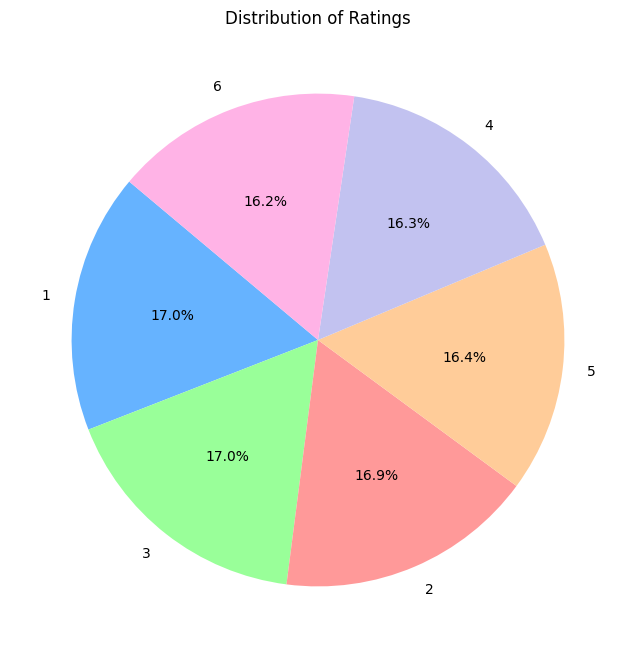

In [ ]:
#Diagramă de Tip Pie pentru Distribuția Rating:
plt.figure(figsize=(8, 8))
rating_counts = df['rating'].value_counts()
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ff9999','#ffcc99','#c2c2f0','#ffb3e6'])
plt.title('Distribution of Ratings')
plt.show()

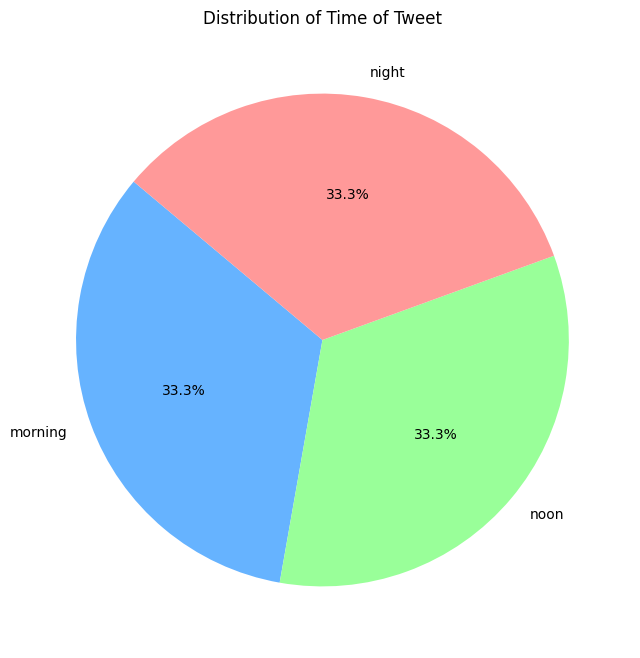

In [ ]:
plt.figure(figsize=(8, 8))
time_counts = df['Time of Tweet'].value_counts()
plt.pie(time_counts, labels=time_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ff9999','#ffcc99'])
plt.title('Distribution of Time of Tweet')
plt.show()

<Figure size 1200x800 with 0 Axes>

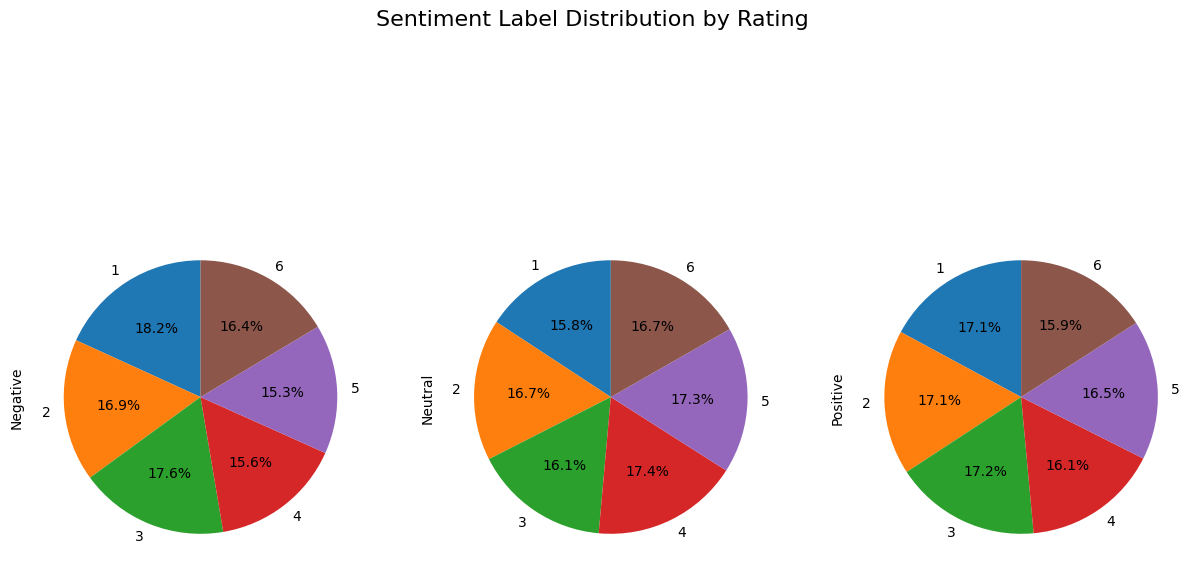

In [ ]:
plt.figure(figsize=(12, 8))
sentiment_by_rating = df.groupby(['rating', 'Sentiment Label']).size().unstack(fill_value=0)
sentiment_by_rating.plot(kind='pie', subplots=True, autopct='%1.1f%%', startangle=90, figsize=(15, 8), legend=False)
plt.suptitle('Sentiment Label Distribution by Rating', fontsize=16)
plt.show()

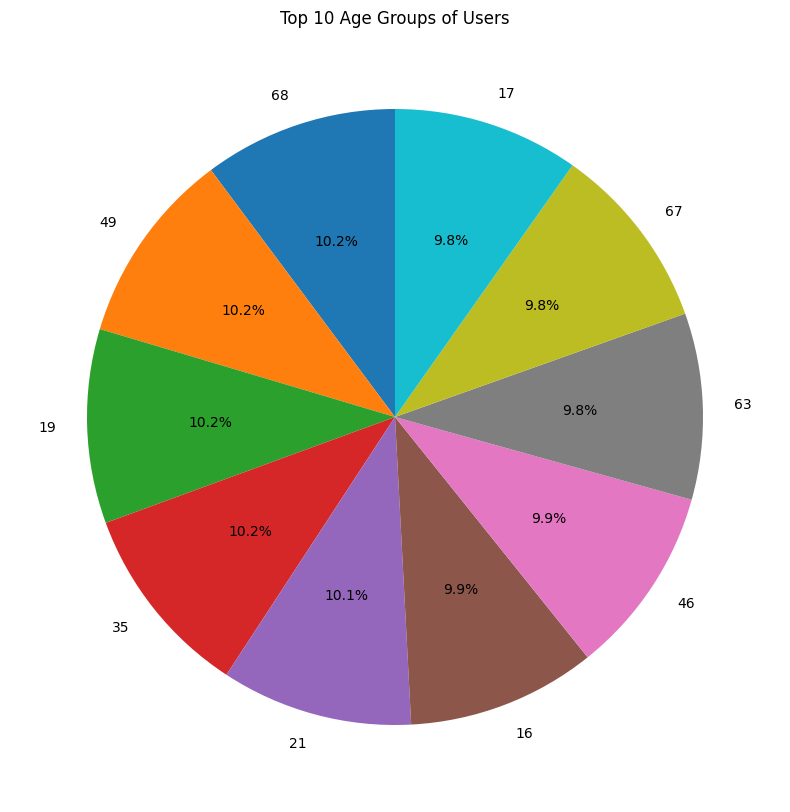

In [ ]:
plt.figure(figsize=(10, 10))
age_counts = df['Age of User'].value_counts().nlargest(10)
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Age Groups of Users')
plt.show()


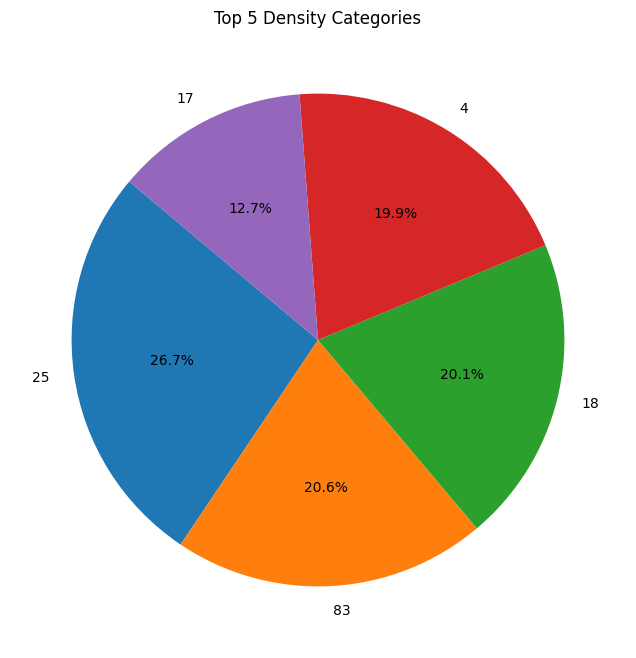

In [ ]:
plt.figure(figsize=(8, 8))
density_counts = df['Density (P/Km²)'].value_counts().nlargest(5)
plt.pie(density_counts, labels=density_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Density Categories')
plt.show()

In [ ]:
pip install wordcloud

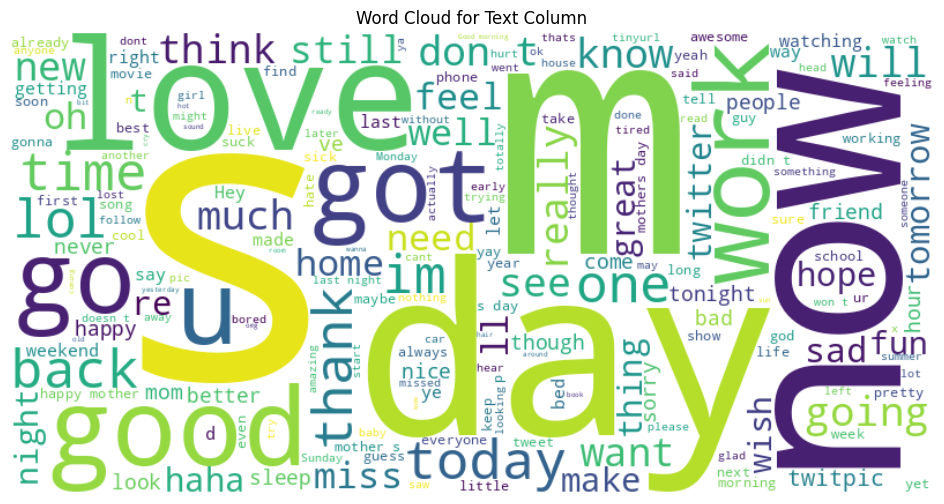

In [ ]:
import pandas as pd

# Citeste datele dintr-un fișier CSV
df = pd.read_csv("Sentiment Analysis Dataset_exported.csv")

# Continuă cu codul pentru Word Cloud
text_data = df['text'].dropna().str.cat(sep=' ')

# Creează un obiect WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plotează Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Text Column')
plt.show()

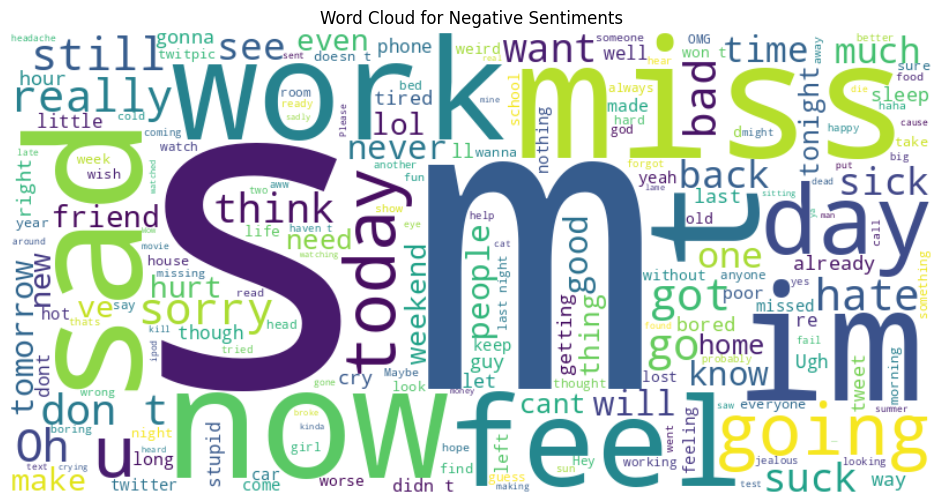

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filtrarea datelor pentru sentimentul negativ
negative_text_data = df[df['sentiment'] == 'negative']['text'].dropna().str.cat(sep=' ')

# Creează un obiect WordCloud pentru sentimentul negativ
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text_data)

# Plotează Word Cloud pentru sentimentul negativ
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiments')
plt.show()

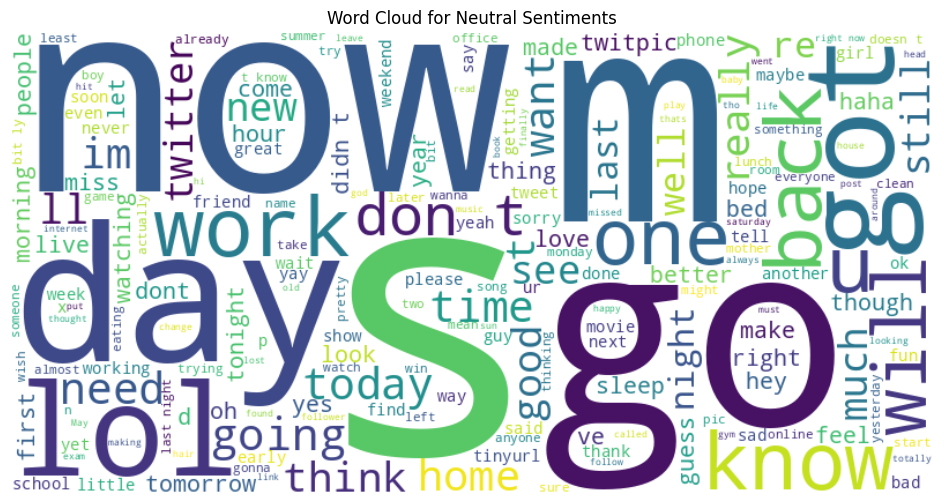

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filtrarea datelor pentru sentimentul neutru
neutral_text_data = df[df['sentiment'] == 'neutral']['text'].dropna().str.cat(sep=' ')

# Creează un obiect WordCloud pentru sentimentul neutru
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_text_data)

# Plotează Word Cloud pentru sentimentul neutru
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Sentiments')
plt.show()